# Fig 1.26 temperatures

Plotting the temperatures which appear in Fig 1.26

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import glob
import os.path

import matplotlib.pyplot as plt
import pandas as pd
import scmdata
from netcdf_scm.io import load_mag_file

import utils.cmip
import utils.plotting

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = [12, 8]

<IPython.core.display.Javascript object>

In [5]:
ref_period = range(1850, 1900 + 1)

<IPython.core.display.Javascript object>

In [6]:
SOURCE_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "cmip6-science-unimelb",
    "cmip_data_tas_projections.nc",
)
SOURCE_FILE

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/processed/cmip6-science-unimelb/cmip_data_tas_projections.nc'

<IPython.core.display.Javascript object>

In [7]:
db = utils.cmip.get_longest_ensemble_member_for_climate_model(
    scmdata.ScmRun(scmdata.ScmRun.from_nc(SOURCE_FILE)),
    range(1850, 2300 + 1),
    range(1850, 2014 + 1),
)
db

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


No useable data for CESM1-WACCM rcp26
No useable data for CNRM-CM5 rcp26
No useable data for HadGEM2-AO rcp26
No useable data for HadGEM2-ES rcp26
No useable data for CESM1-BGC rcp45
No useable data for CESM1-WACCM rcp45
No useable data for CMCC-CM rcp45
No useable data for CNRM-CM5 rcp45
No useable data for CSIRO-Mk3L-1-2 rcp45
No useable data for CanCM4 rcp45
No useable data for HadCM3 rcp45
No useable data for HadGEM2-AO rcp45
No useable data for HadGEM2-CC rcp45
No useable data for MIROC4h rcp45
No useable data for inmcm4 rcp45
No useable data for HadGEM2-AO rcp60
No useable data for HadGEM2-ES rcp60
No useable data for CESM1-BGC rcp85
No useable data for CESM1-WACCM rcp85
No useable data for CMCC-CESM rcp85
No useable data for CMCC-CM rcp85
No useable data for CNRM-CM5 rcp85
No useable data for HadGEM2-AO rcp85
No useable data for HadGEM2-CC rcp85
No useable data for MRI-ESM1 rcp85
No useable data for inmcm4 rcp85
No useable data for CAMS-CSM1-0 ssp119
No useable data for EC-Earth

<scmdata.ScmRun (timeseries: 213, timepoints: 451)>
Time:
	Start: 1850-07-01T00:00:00
	End: 2300-07-01T00:00:00
Meta:
	     climate_model member_id        model region scenario unit variable
	0          BNU-ESM    r1i1p1  unspecified  World    rcp26    K      tas
	1            CCSM4    r1i1p1  unspecified  World    rcp26    K      tas
	2       CESM1-CAM5    r1i1p1  unspecified  World    rcp26    K      tas
	3    CSIRO-Mk3-6-0    r1i1p1  unspecified  World    rcp26    K      tas
	4          CanESM2    r1i1p1  unspecified  World    rcp26    K      tas
	..             ...       ...          ...    ...      ...  ...      ...
	208     MIROC-ES2L  r1i1p1f2  unspecified  World   ssp585    K      tas
	209         MIROC6  r1i1p1f1  unspecified  World   ssp585    K      tas
	210  MPI-ESM1-2-LR  r1i1p1f1  unspecified  World   ssp585    K      tas
	211     MRI-ESM2-0  r1i1p1f1  unspecified  World   ssp585    K      tas
	212    UKESM1-0-LL  r4i1p1f2  unspecified  World   ssp585    K      tas
	
	[21

<IPython.core.display.Javascript object>

In [8]:
db["id"] = db["climate_model"] + db["member_id"]
db

<scmdata.ScmRun (timeseries: 213, timepoints: 451)>
Time:
	Start: 1850-07-01T00:00:00
	End: 2300-07-01T00:00:00
Meta:
	     climate_model                     id member_id        model region  \
	0          BNU-ESM          BNU-ESMr1i1p1    r1i1p1  unspecified  World   
	1            CCSM4            CCSM4r1i1p1    r1i1p1  unspecified  World   
	2       CESM1-CAM5       CESM1-CAM5r1i1p1    r1i1p1  unspecified  World   
	3    CSIRO-Mk3-6-0    CSIRO-Mk3-6-0r1i1p1    r1i1p1  unspecified  World   
	4          CanESM2          CanESM2r1i1p1    r1i1p1  unspecified  World   
	..             ...                    ...       ...          ...    ...   
	208     MIROC-ES2L     MIROC-ES2Lr1i1p1f2  r1i1p1f2  unspecified  World   
	209         MIROC6         MIROC6r1i1p1f1  r1i1p1f1  unspecified  World   
	210  MPI-ESM1-2-LR  MPI-ESM1-2-LRr1i1p1f1  r1i1p1f1  unspecified  World   
	211     MRI-ESM2-0     MRI-ESM2-0r1i1p1f1  r1i1p1f1  unspecified  World   
	212    UKESM1-0-LL    UKESM1-0-LLr4i1p1f2  r4

<IPython.core.display.Javascript object>

In [9]:
ASSESSED_TIMESERIES_FILE = os.path.join(
    utils.DATA_DIR,
    "raw",
    "ar6_gsat_assessment",
    "v20210218",
    "AR6 FGD assessment time series - GMST and GSAT.xlsx",
)
ASSESSED_TIMESERIES_FILE
assessed_timeseries_ref_period = range(1850, 1900 + 1)  # see Notes sheet
assert ref_period == assessed_timeseries_ref_period
assessed_timeseries = pd.read_excel(
    ASSESSED_TIMESERIES_FILE,
    sheet_name="Consolidated time series",
    header=None,
    names=["year", "value"],
)
assessed_timeseries

year     value
0    1850 -0.058676
1    1851  0.048824
2    1852  0.078824
3    1853  0.046324
4    1854  0.048824
..    ...       ...
166  2016  1.263824
167  2017  1.178824
168  2018  1.101324
169  2019  1.226324
170  2020  1.256324

[171 rows x 2 columns]

<IPython.core.display.Javascript object>

In [10]:
SOURCE_FILE_PAGES2K = os.path.join(
    utils.DATA_DIR, "processed", "neukom2019temp", "neukom-2019-temp.nc"
)

<IPython.core.display.Javascript object>

In [11]:
db_pages2k = scmdata.ScmRun.from_nc(SOURCE_FILE_PAGES2K)
db_pages2k

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


<scmdata.ScmRun (timeseries: 3, timepoints: 2017)>
Time:
	Start: 0001-01-01T00:00:00
	End: 2017-01-01T00:00:00
Meta:
	         model  percentile region    scenario unit variable
	0  unspecified         2.5  World  historical    K     GMST
	1  unspecified        50.0  World  historical    K     GMST
	2  unspecified        97.5  World  historical    K     GMST

<IPython.core.display.Javascript object>

In [12]:
pages_2k_ref_temp = (
    db_pages2k.filter(percentile=50)
    .filter(year=ref_period)
    .timeseries()
    .mean(axis="columns")
)
float(pages_2k_ref_temp)

-0.3794117647058824

<IPython.core.display.Javascript object>

In [13]:
db_pages2k_rel_to_ref_period = db_pages2k - float(pages_2k_ref_temp)

<IPython.core.display.Javascript object>

In [14]:
assert utils.TEMP_ADJUST_PERIOD == range(1995, 2014 + 1)
assumed_1995_2014_warming = utils.TEMP_ADJUST_TARGET
assumed_1995_2014_warming

0.85

<IPython.core.display.Javascript object>

In [15]:
pdf_cmip = (
    db.filter(scenario="ssp*", region="World").relative_to_ref_period_mean(
        year=range(1995, 2014 + 1)
    )
    + assumed_1995_2014_warming
)

<IPython.core.display.Javascript object>

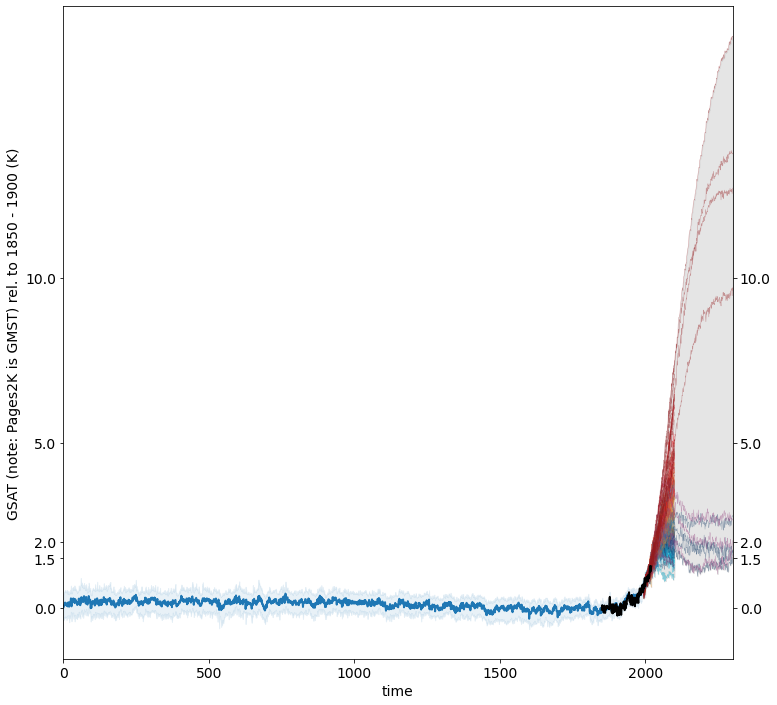

<IPython.core.display.Javascript object>

In [16]:
xmin = 0
xmax = 2300
# xmin = 1900
# xmax = 2100

fig, ax = plt.subplots(figsize=(12, 12))

pdf_cmip_cut = pdf_cmip.filter(year=range(1995, xmax + 1))
ax = pdf_cmip_cut.lineplot(
    palette=utils.plotting.SCENARIO_PALETTE,
    #     units="climate_model",
    units="id",
    estimator=None,
    alpha=0.4,
    linewidth=0.5,
    legend=False,
    time_axis="year",
    ax=ax,
)

ax.fill_between(
    pdf_cmip_cut["year"].values.squeeze(),
    pdf_cmip_cut.timeseries().min().values.squeeze(),
    pdf_cmip_cut.timeseries().max().values.squeeze(),
    color="silver",
    alpha=0.4,
)

db_pages2k_rel_to_ref_period.filter(percentile=50).lineplot(
    palette={"historical": "tab:blue"},
    ax=ax,
    time_axis="year",
    linewidth=2,
    legend=False,
)
ax.fill_between(
    db_pages2k_rel_to_ref_period["year"].values.squeeze(),
    db_pages2k_rel_to_ref_period.filter(percentile=2.5).values.squeeze(),
    db_pages2k_rel_to_ref_period.filter(percentile=97.5).values.squeeze(),
    color="tab:blue",
    alpha=0.1,
)

ax.plot(
    assessed_timeseries["year"],
    assessed_timeseries["value"],
    color="black",
    linewidth=2,
)

ax.set_xlim([xmin, xmax])
ax.set_ylabel(
    f"GSAT (note: Pages2K is GMST) rel. to {ref_period[0]} - {ref_period[-1]} (K)"
)
ax.tick_params(right=True, labelright=True)
ax.set_yticks([0, 1.5, 2, 5, 10])
# plt.savefig("figy_tas.pdf", transparent=True)

In [17]:
OUT_FILE = "figure_y_tas_cmip_data.csv"
cmip_dat = (
    pdf_cmip_cut.timeseries()
    .dropna(how="all")
    .reset_index()[["climate_model", "member_id", "scenario"]]
    .drop_duplicates()
)
display(cmip_dat)
# cmip_dat.to_csv(OUT_FILE, index=False)
# !wc -l {OUT_FILE}
# !head {OUT_FILE}
# !du -sh {OUT_FILE}
# !tail {OUT_FILE}

time  climate_model member_id scenario
0       CNRM-ESM2-1  r1i1p1f2   ssp119
1           CanESM5  r1i1p1f1   ssp119
2         EC-Earth3  r4i1p1f1   ssp119
3         FGOALS-g3  r1i1p1f1   ssp119
4       GISS-E2-1-G  r1i1p1f2   ssp119
..              ...       ...      ...
112      MIROC-ES2L  r1i1p1f2   ssp585
113          MIROC6  r1i1p1f1   ssp585
114   MPI-ESM1-2-LR  r1i1p1f1   ssp585
115      MRI-ESM2-0  r1i1p1f1   ssp585
116     UKESM1-0-LL  r4i1p1f2   ssp585

[117 rows x 3 columns]

<IPython.core.display.Javascript object>